___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

In [1]:
#In this section we import the neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# We import the data called Ecommerce_Customers.csv 
customers = pd.read_csv('Ecommerce Customers')

In [6]:
# We check the head() DataFrame

customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [12]:
# We see information about the columns like the number of non-null values, and the respective metrics for the
# numerical columns

print(customers.describe())
print('\n')
print('\n')
print('\n')
print(customers.info())

       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462  


## Exploratory Data Analysis


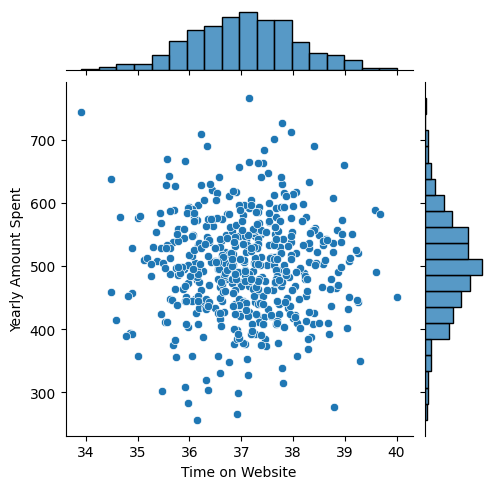

In [18]:
#Creamos una gráfica tipo 'Jointplot' para comparar el tiempo en el sitio web y la cantidad de dinero gastado.
sns.jointplot(customers, x= 'Time on Website', y='Yearly Amount Spent', height=5)

#Vemos una distribución normal tanto en el tiempo gastado en el sitio web como en el dinero gastado
#En la región central vemos una mayor acumulación de puntos, lo cual es razonable porque viene de las dos
#distribuciones normales.
#Pero no parece haber un comportamiento tan claro de que entre más tiempo en la web, se gasté más dinero.

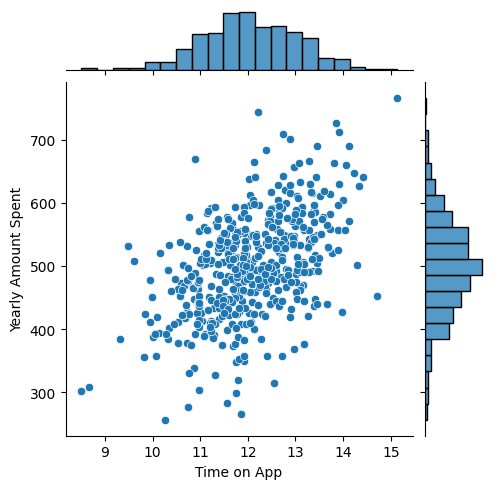

In [19]:
#Ahora hacemos una gráfica análoga a la anterior pero con el tiempo en la app.
sns.jointplot(customers, x= 'Time on App', y='Yearly Amount Spent', height=5)

#En la gráfica se puede ver una relación más directa entre el tiempo en la app y el dinero gastado.

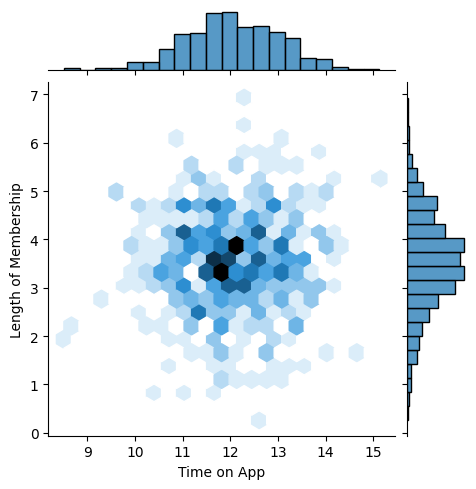

In [21]:
#Ahora queremos ver el comportamiento entre el tiempo en la app y la duración de su suscripción

sns.jointplot(customers, x= 'Time on App', y='Length of Membership', kind= 'hex', height=5)

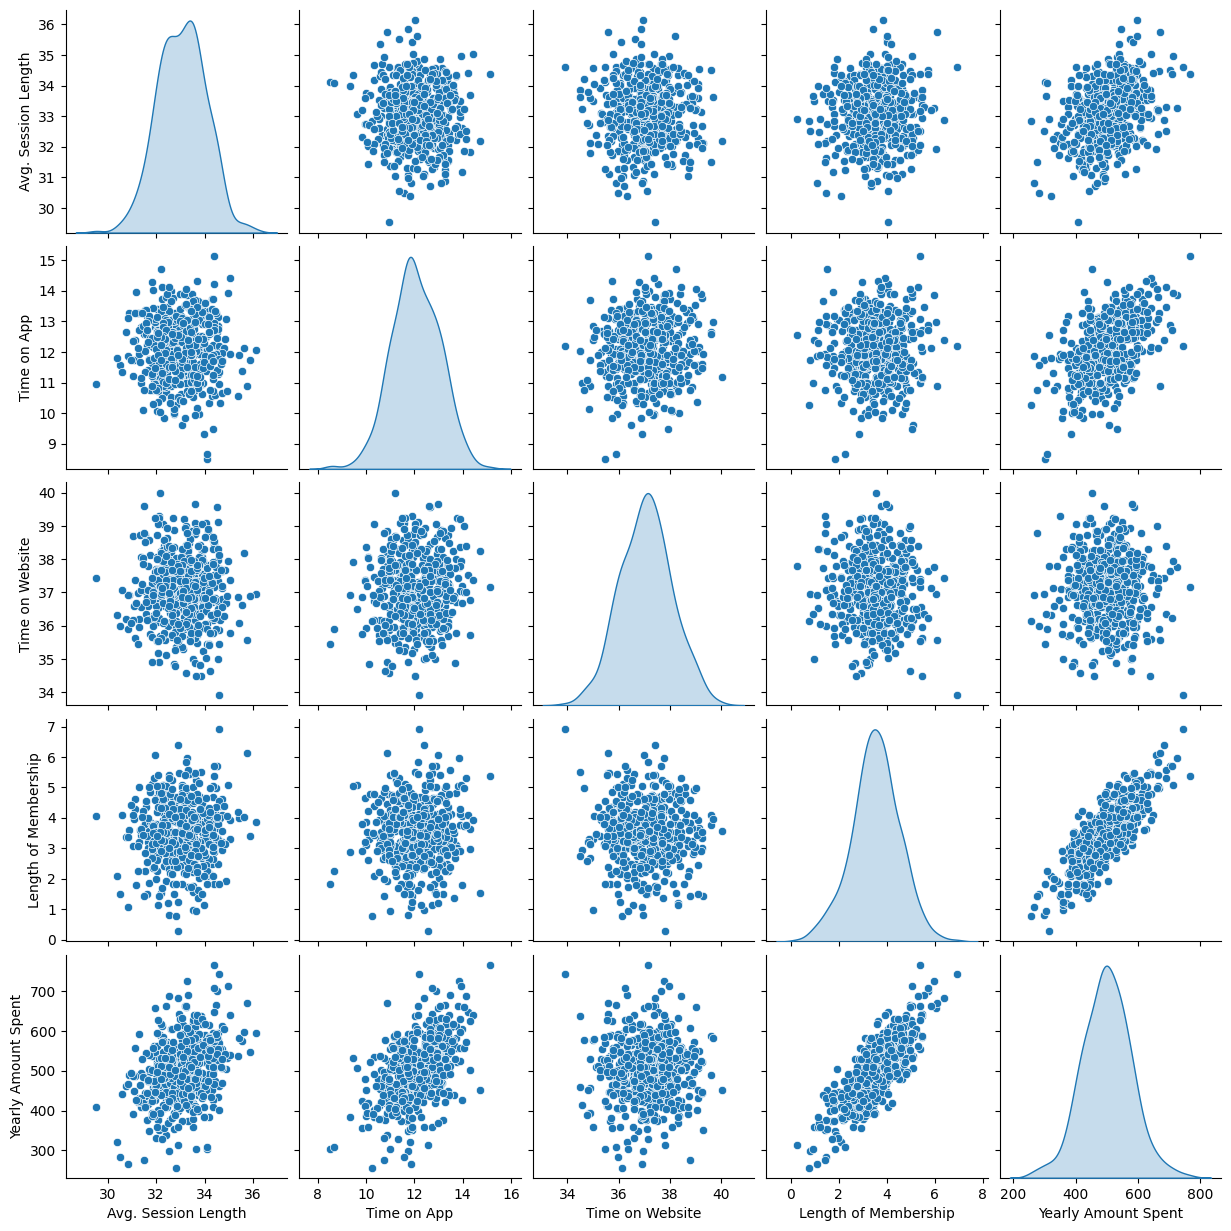

In [23]:
#Usamos una gráfica tipo 'Pairplot' para ver los distintos tipos de relación de todo el set de datos.

sns.pairplot(customers, diag_kind='kde')

# Aquí vemos que las características que más se correlacionan linealmente son:
#     La duración de la suscripción y la cantidad de dinero gastada al año

 * Como vimos que la duración de suscripción y la cantidad de dinero gastada al año son las que más se relacionan
 * vamos a hacer una gráfica de regresión lineal para ver su relación 
 * 

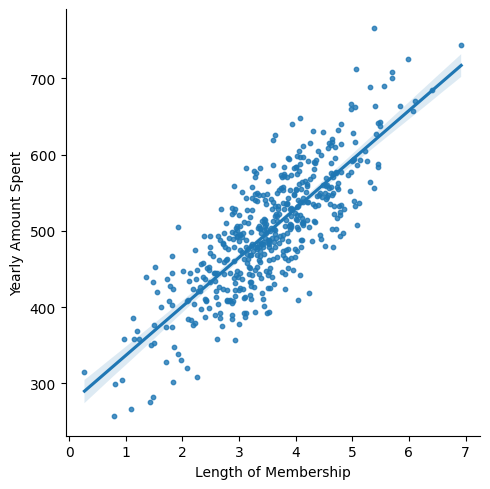

In [28]:
sns.lmplot(data= customers, x='Length of Membership', y= 'Yearly Amount Spent', scatter_kws={"s": 10})

#Vemos que si cumple con un comportamiento de relación lineal

# Training and Testing Data

In [6]:
#Vamos a revisar las columnas de nuestro DataFrame
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
#Ahora dividimos en nuestras variables predictoras, y nuestra variable a predecir, que en este caso
#nos interesa saber cuanto es lo esperado que una persona gaste

X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [8]:
#Vamos a importar la libreria que nos permite seccionar los datos 
#en datos de entrenamiento y de testeo
from sklearn.model_selection import train_test_split

In [9]:
#Dividimos nuestros datos con un porcentaje del 30% para los datos a testear

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)


## Training Data

In [10]:
#Dado que tenemos valores númericos, vamos a proponer un modelo lineal en los comportamientos de los datos
#por lo que vamos a importar el modelo necesario
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()
#Creamos un modelo lineal

In [12]:
#Ahora vamos a hacer aplicar el modelo a los datos de entrenamiento
lm.fit(X_train, y_train)

LinearRegression()

Ahora vamos a obtener los coeficientes de dicho modelo, dado que tenemos una relación lineal de la forma

$ y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} $

Vamos a obtener la relación entre el monto del gasto anual y las demás variables


In [15]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coeffecient']
coefficients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Podemos interpretar a los coeficientes de la siguiente manera:

* Manteniendo todas las demás características fijas, un aumento de 1 unidad en el Promedio. La duración de la sesión está asociada con un aumento de 25,98 dólares totales gastados.

* Manteniendo fijas todas las demás funciones, un aumento de 1 unidad en el tiempo en la aplicación se asocia con un aumento de 38,59 dólares totales gastados.

* Manteniendo todas las demás funciones fijas, un aumento de 1 unidad en el tiempo en el sitio web se asocia con un aumento de 0,19 dólares totales gastados.

* Manteniendo todas las demás funciones fijas, un aumento de 1 unidad en la duración de la membresía se asocia con un aumento de 61,27 dólares totales gastados.

# Ahora vamos a hacer la predicción dadas los datos de testeo

In [16]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'y predicted')

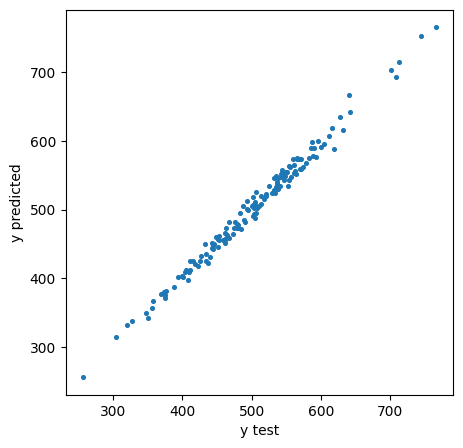

In [18]:
#Ahora vamos a graficar los datos predecidos, con los datos ya conocidos 'y_test' 
#y ver si muestran un comportamiento igual o muy cercano

plt.figure(figsize=(5,5))
plt.scatter(y_test, predictions, s=7)

plt.xlabel('y test')
plt.ylabel('y predicted')

#### Como tenemos una gráfica que es practicamente una linea recta con pendiente = 1, 
#### vemos que tenemos una correcta predicción

# Ahora vamos a evaluar el modelo, con las métricas 
# acordes a la regresión lineal

In [20]:
from sklearn import metrics
#Vamos a importar la paqueteria que nos permite evaluar las métricas necesarias

# Contamos con lo siguiente en la teoría:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


Como tenemos un 'mean squared error' muy pequeño en comparación con los valores de y_test (aprox 8.9/400),
podemos decir que tenemos una buena estimación.

Por lo cual nuestro modelo funciona para describir el comportamiento del gasto total dadas las variables dadas.

## Por lo que vemos que mayor tiempo en la app nos representa un mayor gasto,
## entonces podemos mejorar dicha experiencia para poder obtener mayores 
## ingresos.
## Por otra parte, crear mecanismos de fidelidad en la membresia, ya que es la variable
## que mayor impacto tiene en el ingreso.